In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# Carregar dataset

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
x_train.shape

(60000, 28, 28)

Normalização dos dados

In [49]:
x_train = x_train.astype("float32").reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.astype("float32").reshape(-1, 28, 28, 1) / 255.0

In [52]:
model = keras.Sequential([
    layers.Conv2D(32, 3, activation="relu"), 
    layers.MaxPooling2D(), 
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(), 
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

Epoch 1/10
1875/1875 - 4s - loss: 0.1214 - accuracy: 0.9629
Epoch 2/10
1875/1875 - 4s - loss: 0.0399 - accuracy: 0.9880
Epoch 3/10
1875/1875 - 4s - loss: 0.0264 - accuracy: 0.9913
Epoch 4/10
1875/1875 - 4s - loss: 0.0176 - accuracy: 0.9944
Epoch 5/10
1875/1875 - 4s - loss: 0.0136 - accuracy: 0.9958
Epoch 6/10
1875/1875 - 4s - loss: 0.0112 - accuracy: 0.9962
Epoch 7/10
1875/1875 - 4s - loss: 0.0087 - accuracy: 0.9972
Epoch 8/10
1875/1875 - 4s - loss: 0.0081 - accuracy: 0.9974
Epoch 9/10
1875/1875 - 4s - loss: 0.0058 - accuracy: 0.9982
Epoch 10/10
1875/1875 - 4s - loss: 0.0056 - accuracy: 0.9981
313/313 - 1s - loss: 0.0359 - accuracy: 0.9925


[0.03591574728488922, 0.9925000071525574]

In [53]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               409856    
_________________________________________________________________
dense_32 (Dense)             (None, 10)              

In [61]:
y_pred = model(x_test)
y_pred = y_pred.numpy().argmax(axis=1)
cf_matrix = tf.math.confusion_matrix(y_test, y_pred)

cf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    0,    0,    1,    1,    2,    1,    0],
       [   0, 1129,    1,    1,    0,    0,    0,    2,    2,    0],
       [   1,    0, 1029,    0,    0,    0,    0,    2,    0,    0],
       [   0,    0,    0, 1001,    0,    5,    0,    2,    1,    1],
       [   0,    0,    2,    0,  975,    0,    1,    0,    1,    3],
       [   0,    0,    0,    4,    0,  887,    1,    0,    0,    0],
       [   1,    2,    0,    0,    1,    4,  947,    0,    3,    0],
       [   0,    1,    3,    0,    0,    1,    0, 1021,    0,    2],
       [   2,    0,    0,    1,    0,    1,    0,    3,  967,    0],
       [   1,    0,    0,    0,    5,    4,    1,    1,    3,  994]],
      dtype=int32)>

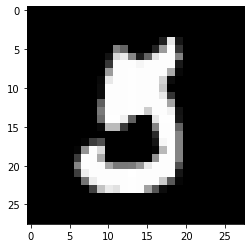

In [69]:
import matplotlib.pyplot as plt

i_check = []
for i, (y_t, y_p) in enumerate(zip(y_test, y_pred)):
    if y_t == 5 and y_p == 3:
       i_check.append(i)

image = x_test[i_check[2]].reshape((28, 28)) * 255
plt.imshow(image , cmap="gray")

In [74]:
model = keras.Sequential([
    layers.Conv2D(64, 3, activation="relu", kernel_initializer="he_uniform"),
    layers.Conv2D(64, 3, activation="relu", kernel_initializer="he_uniform"),
    layers.MaxPooling2D(), 
    layers.BatchNormalization(),
    layers.Conv2D(128, 3, activation="relu", kernel_initializer="he_uniform"),
    layers.Conv2D(128, 3, activation="relu", kernel_initializer="he_uniform"),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(256, 3, activation="relu", kernel_initializer="he_uniform"),
    layers.MaxPooling2D(),
    layers.Flatten(), 
    layers.BatchNormalization(),
    layers.Dense(512, activation="relu", kernel_initializer="he_uniform"),
    layers.Dense(10, activation="softmax")
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9),
    metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

Epoch 1/10
1875/1875 - 8s - loss: 0.0971 - accuracy: 0.9704
Epoch 2/10
1875/1875 - 8s - loss: 0.0338 - accuracy: 0.9895
Epoch 3/10
1875/1875 - 8s - loss: 0.0209 - accuracy: 0.9933
Epoch 4/10
1875/1875 - 8s - loss: 0.0141 - accuracy: 0.9955
Epoch 5/10
1875/1875 - 8s - loss: 0.0093 - accuracy: 0.9969
Epoch 6/10
1875/1875 - 8s - loss: 0.0069 - accuracy: 0.9977
Epoch 7/10
1875/1875 - 8s - loss: 0.0047 - accuracy: 0.9985
Epoch 8/10
1875/1875 - 8s - loss: 0.0037 - accuracy: 0.9989
Epoch 9/10
1875/1875 - 8s - loss: 0.0025 - accuracy: 0.9991
Epoch 10/10
1875/1875 - 8s - loss: 0.0018 - accuracy: 0.9995
313/313 - 1s - loss: 0.0270 - accuracy: 0.9938


[0.02703659050166607, 0.9937999844551086]

In [71]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 4, 4, 128)       

In [75]:
y_pred = model(x_test)
y_pred = y_pred.numpy().argmax(axis=1)
cf_matrix = tf.math.confusion_matrix(y_test, y_pred)

cf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    1, 1022,    2,    1,    0,    1,    4,    0,    0],
       [   0,    0,    0, 1009,    0,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   2,    0,    0,    6,    0,  882,    1,    1,    0,    0],
       [   4,    3,    0,    0,    1,    1,  948,    0,    1,    0],
       [   0,    3,    1,    0,    1,    0,    0, 1021,    1,    1],
       [   0,    0,    0,    1,    0,    1,    0,    2,  969,    1],
       [   0,    0,    0,    0,    7,    1,    0,    5,    2,  994]],
      dtype=int32)>

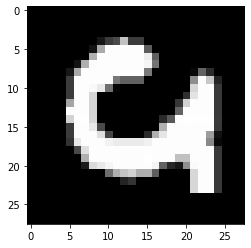

In [79]:
import matplotlib.pyplot as plt

i_check = []
for i, (y_t, y_p) in enumerate(zip(y_test, y_pred)):
    if y_t == 9 and y_p == 4:
       i_check.append(i)

image = x_test[i_check[3]].reshape((28, 28)) * 255
plt.imshow(image , cmap="gray")

# Data augmentation

Variar deslocamento

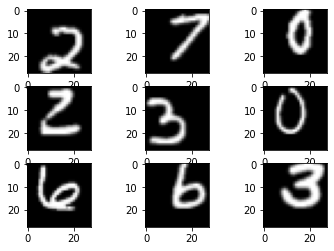

In [83]:
from keras.preprocessing.image import ImageDataGenerator

shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

datagen.fit(x_train)

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	plt.show()
	break

Variar rotação

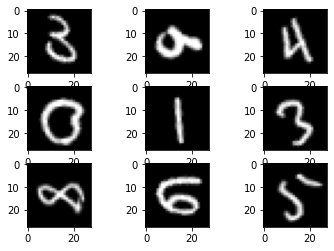

In [84]:
datagen = ImageDataGenerator(rotation_range=90)

datagen.fit(x_train)

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	plt.show()
	break

Inverter imagem verticalmente ou horizontalmente

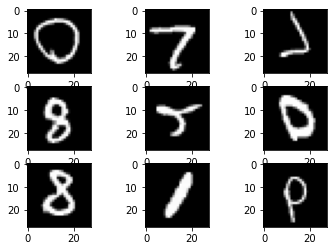

In [85]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

datagen.fit(x_train)

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	plt.show()
	break

Treinamento com dataset aumentado

In [89]:
model = keras.Sequential([
    layers.Conv2D(32, 3, activation="relu"), 
    layers.MaxPooling2D(), 
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(), 
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)

shift = 0.2
datagen = ImageDataGenerator(horizontal_flip=True, 
                             vertical_flip=True,
                             rotation_range=90,
                             width_shift_range=shift, 
                             height_shift_range=shift)

datagen.fit(x_train)

# for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          steps_per_epoch=len(x_train) / 32, epochs=10, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

Epoch 1/10
1875/1875 - 14s - loss: 1.2868 - accuracy: 0.5462
Epoch 2/10
1875/1875 - 14s - loss: 0.7338 - accuracy: 0.7573
Epoch 3/10
1875/1875 - 14s - loss: 0.5690 - accuracy: 0.8150
Epoch 4/10
1875/1875 - 14s - loss: 0.4995 - accuracy: 0.8347
Epoch 5/10
1875/1875 - 14s - loss: 0.4578 - accuracy: 0.8493
Epoch 6/10
1875/1875 - 14s - loss: 0.4257 - accuracy: 0.8597
Epoch 7/10
1875/1875 - 14s - loss: 0.4073 - accuracy: 0.8641
Epoch 8/10
1875/1875 - 14s - loss: 0.3944 - accuracy: 0.8684
Epoch 9/10
1875/1875 - 14s - loss: 0.3827 - accuracy: 0.8724
Epoch 10/10
1875/1875 - 14s - loss: 0.3739 - accuracy: 0.8760
313/313 - 1s - loss: 0.3230 - accuracy: 0.8925


[0.3230091631412506, 0.8924999833106995]

Busca por parâmetros em CNN no MNIST: https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist

# Exercício

Experimentar com os diferentes parâmetros, números de neurônios, técnicas de data augmentation até atingir o melhor resultado possível no conjunto de dados de teste.